In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import re

In [2]:
import emoji

#### function to check if a character is emoji

In [3]:
from emoji import emoji_lis
def is_emoji(s):
    return len(emoji_lis(s))

### function to remove emoji and convert it into text

In [4]:
def prep(x):
    if(type(x)!=str):
        return x
    y = ""
    un_emoji = {}
    for i in x:
        if(is_emoji(i)):
            try:
                if(un_emoji[i]==0):
                    y = y+i
            except:
                un_emoji[i] = 1
                y = y+i
        else:
            y= y +i
    return emoji.demojize(y).replace("_"," ").replace(":",", ").lower()

In [5]:
from nltk.tokenize import PunktSentenceTokenizer
punk = PunktSentenceTokenizer()

In [6]:
def check_ayush(x):
    y = ""
    if(type(x)!=str):
        return x
    for s in punk.tokenize(x):
        a,b = 0,0
        if(re.search('ayush',s)):
            a = 1
        if(re.search('barkha',s) or re.search('bharkha',s) or re.search('bhark',s)):
            b = 1
        if((a==1) and (b==0)):
            y= y+s
    return y
def check_barkha(x):
    y = ""
    if(type(x)!=str):
        return x
    for s in punk.tokenize(x):
        a,b = 0,0
        if(re.search('ayush',s)):
            a = 1
        if(re.search('barkha',s) or re.search('bharkha',s) or re.search('bhark',s)):
            b = 1
        if((a==0) and (b==1)):
            y= y+s
    return y
def check_both(x):
    y = ""
    if(type(x)!=str):
        return x
    for s in punk.tokenize(x):
        a,b = 0,0
        if(re.search('ayush',s)):
            a = 1
        if(re.search('barkha',s) or re.search('bharkha',s) or re.search('bhark',s)):
            b = 1
        if(a*b==1):
            y= y+s
    return y

In [7]:
findf = pd.DataFrame()
f = True
for i in range(1,7):
    sheet = 'S2 E'+str(i)
    df = pd.read_excel("/home/shaury/Downloads/Comments - PFA S2.xlsx",sheet_name=sheet)
    df['Comment']=df['Comment'].astype(str)
    df['comment'] = df['Comment'].map(prep)
    df['ayush'] = df['comment'].map(check_ayush)
    df['barkha'] = df['comment'].map(check_barkha)
    df['both'] = df['comment'].map(check_both)
    if(f):
        findf = df
        f = False
    else:
        findf = pd.concat([findf,df])
        findf = findf.reset_index(drop=True)

In [8]:
len(findf)

32884

In [9]:
findf[findf['both'].map(lambda x: True if(len(x)>0) else False)]

,Name,Comment,Time,Likes,Reply Count,comment,ayush,barkha,both
13,Soumik Bera,"<a href=""https://www.youtube.com/watch?v=8PHs0...",2021-09-11T16:04:01Z,0,0,"<a href=""https, //www.youtube.com/watch?v=8phs...",,,"<a href=""https, //www.youtube.com/watch?v=8phs..."
44,Adarsh Yadav,I want to see Ayush and barkha together a one...,2021-08-02T17:44:04Z,0,0,i want to see ayush and barkha together a one...,,,i want to see ayush and barkha together a one...
55,Rachana L,Literally barkha and Ayush will make a good pa...,2021-07-17T05:01:56Z,1,0,literally barkha and ayush will make a good pa...,,,literally barkha and ayush will make a good pa...
63,Sejal Chaudhary,Barkha and Ayush together looking so cute 😀😍❤❤,2021-07-08T17:30:24Z,1,0,"barkha and ayush together looking so cute , gr...",,,"barkha and ayush together looking so cute , gr..."
72,CR MOTIONS,Here&#39;s a teaser of ayush mehra and barkha ...,2021-06-29T09:34:43Z,0,0,here&#39;s a teaser of ayush mehra and barkha ...,,,here&#39;s a teaser of ayush mehra and barkha ...
...,...,...,...,...,...,...,...,...,...
32857,Shakuntla Bishnoi,Who else want more series of ayush and barkha ...,2020-11-24T07:00:16Z,1212,61,who else want more series of ayush and barkha ...,,,who else want more series of ayush and barkha ??
32858,Aryan Jawa,just can&#39;t wait...loved this series till n...,2020-11-24T07:00:15Z,2,0,just can&#39;t wait...loved this series till n...,,,just can&#39;t wait...loved this series till n...
32859,Avnipriya Marandi 27,What ⁉...its today last episode .😭<br>we&#39;l...,2020-11-24T07:00:13Z,17,2,"what , exclamation question mark, ...its today...",,,"what , exclamation question mark, ...its today..."
32860,Yogesh Dahiya,i hope today Barkha and Ayush will join us in ...,2020-11-24T06:59:56Z,2,0,i hope today barkha and ayush will join us in ...,,,i hope today barkha and ayush will join us in ...


In [10]:
findf[findf['barkha'].map(lambda x: True if(len(x)>0) else False)]

,Name,Comment,Time,Likes,Reply Count,comment,ayush,barkha,both
6,KARSSHNAA MTP,Hey barkha give me your number,2021-09-13T13:18:39Z,0,0,hey barkha give me your number,,hey barkha give me your number,
49,Toheed naeem,Barkha yaaaaaar,2021-07-21T11:07:33Z,0,0,barkha yaaaaaar,,barkha yaaaaaar,
50,Suryaanshh C.B. Joushi,"<a href=""https://www.youtube.com/watch?v=8PHs0...",2021-07-21T10:30:08Z,1,0,"<a href=""https, //www.youtube.com/watch?v=8phs...",,"<a href=""https, //www.youtube.com/watch?v=8phs...",
73,Anmol varhney,Aree koi barkha ko post grad kra do...har seri...,2021-06-28T13:56:47Z,0,0,aree koi barkha ko post grad kra do...har seri...,,aree koi barkha ko post grad kra do...har seri...,
77,Mr 21 YT,When i see barkha i can’t control myself to op...,2021-06-26T12:25:11Z,0,0,when i see barkha i can’t control myself to op...,,when i see barkha i can’t control myself to op...,
...,...,...,...,...,...,...,...,...,...
32642,Sankalp Kumar,barkha didn&#39;t join the chat yet. where is ...,2020-11-24T07:59:28Z,0,0,barkha didn&#39;t join the chat yet. where is ...,,barkha didn&#39;t join the chat yet.,
32643,Bibek Dhara,Barkha di was/is my first crush❤️❤️❤️❤️,2020-11-24T07:59:24Z,1,0,"barkha di was/is my first crush, red heart,",,"barkha di was/is my first crush, red heart,",
32797,Luv Tyagi,Barkha is awesome yrr,2020-11-24T07:11:51Z,1,0,barkha is awesome yrr,,barkha is awesome yrr,
32812,shifa shaikh,I love Barkha&#39;s skin 🥺🥺💕,2020-11-24T07:08:28Z,0,0,"i love barkha&#39;s skin , pleading face, , tw...",,"i love barkha&#39;s skin , pleading face, , tw...",


In [11]:
findf[findf['ayush'].map(lambda x: True if(len(x)>0) else False)]

,Name,Comment,Time,Likes,Reply Count,comment,ayush,barkha,both
22,Keerthana Vajrala,I feel like seeing Varun Dhawan when I see Ayush,2021-09-03T10:17:50Z,0,0,i feel like seeing varun dhawan when i see ayush,i feel like seeing varun dhawan when i see ayush,,
29,Nagendra M D,So innocent ayush. I&#39;m also somewhere like...,2021-08-24T18:38:17Z,0,0,so innocent ayush. i&#39;m also somewhere like...,so innocent ayush.,,
56,Ronit Birla,Ayush enjoying his own song LOL XD,2021-07-17T03:09:56Z,0,0,ayush enjoying his own song lol xd,ayush enjoying his own song lol xd,,
66,Hafsa Mohammed,Ayushhhhhhhh♥️♥️,2021-07-03T16:10:29Z,0,0,"ayushhhhhhhh, heart suit,","ayushhhhhhhh, heart suit,",,
99,Pa Yel,Ayush is so sweet and melty🥰,2021-06-06T08:53:33Z,0,0,"ayush is so sweet and melty, smiling face with...","ayush is so sweet and melty, smiling face with...",,
...,...,...,...,...,...,...,...,...,...
32628,Kartikeya Sahlot,i think ayush is the most handsome filtercopy ...,2020-11-24T08:00:29Z,1,0,i think ayush is the most handsome filtercopy ...,i think ayush is the most handsome filtercopy ...,,
32672,RAVINA GHATGE,Best Series 💖 I love Ayush and Saniya ❤️❤️❤️,2020-11-24T07:55:23Z,0,0,"best series , sparkling heart, i love ayush a...","best series , sparkling heart, i love ayush a...",,
32705,manav laddha,I just don&#39;t understand why do boys in suc...,2020-11-24T07:46:15Z,0,1,i just don&#39;t understand why do boys in suc...,like dhruv in little things similarly ayush in...,,
32755,MANAV SHARMA,"@ayush mehra..u lied to us...u said <a href=""h...",2020-11-24T07:29:21Z,0,0,"@ayush mehra..u lied to us...u said <a href=""h...","@ayush mehra..u lied to us...u said <a href=""h...",,


In [30]:
both,ayush,barkha = [],[],[]

## functions to tokeninze the sentneces to get the individual sentences

In [13]:
from nltk.tokenize import PunktSentenceTokenizer
punk = PunktSentenceTokenizer()

In [31]:
for i in findf['both']:
    sent = punk.tokenize(i)
    for h in sent:
        both.append(h)

In [32]:
for i in findf['ayush']:
    sent = punk.tokenize(i)
    for h in sent:
        ayush.append(h)

In [33]:
for i in findf['barkha']:
    sent = punk.tokenize(i)
    for h in sent:
        barkha.append(h)

In [17]:
both_count,ayush_count,barkha_count = {},{},{}
both_count["pos"],both_count["neg"] = 0,0
ayush_count["pos"],ayush_count["neg"] = 0,0
barkha_count["pos"],barkha_count["neg"] = 0,0

### sentiments analysis

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [23]:
senti = SentimentIntensityAnalyzer()

In [24]:
hindi_words = {
                "acha": 3.0,
                "bahut acha": 3.0,
                "badhiya": 3.0,
                "mast": 3.0,
                "gazab": 3.0,
                "behtareen": 3.0,
                "mazedar": 3.0,
                "jhakkas": 3.5,
                "sundar": 3.5,
                "khoobsurat": 3,
                "bawaal": 3.5,
                "ek no.":3,
                "ek number": 3,
                "sahi": 2,
                "lajawaab":2,
                "lajawab":2,
                "rapchik":2,
                "pyaar":3,
                "pyar":3,
                
                
                "bura": -2,
                "bekar": -2,
                "bekaar": -1,
                "ghatiya": -1.5,
                "ganda": -1.5,
                "kharaab": -2,
                "kharab":    -2
                }

## adding commonly used hindi words in vader lexicons

In [25]:
senti.lexicon.update(hindi_words)

In [26]:
def pos_neg(x):
    if(senti.polarity_scores(x)['pos']>senti.polarity_scores(x)['neg']):
        return 'Positive'
    elif(senti.polarity_scores(x)['pos']<senti.polarity_scores(x)['neg']):
        return 'Negative'
    else:
        return 'Neutral'

In [34]:
len(both),len(ayush),len(barkha)

(1786, 850, 890)

In [41]:
def ayush_barkha(x):
    f,g=0,0
    if(re.search('ayush',x)):
        f = 1
    if(re.search('barkha',x) or re.search('bharkha',x) or re.search('bhark',x)):
        g = 1
    #check
    if((f==1) and (g==1)):
        return 'both'
    elif(f==1):
        return 'ayush'
    elif(g==1):
        return 'barkha'
    else:
        return 'none'

In [52]:
df1 = pd.DataFrame({"both":both})
df2 = pd.DataFrame({"ayush":ayush})
df3 = pd.DataFrame({"barkha":barkha})

In [53]:
df1['nature of comment for both'] = df1['both'].map(pos_neg)
df2['nature of comment ayush'] = df2['ayush'].map(pos_neg)
df3['nature of comment barkha'] = df3['barkha'].map(pos_neg)

<AxesSubplot:xlabel='nature of comment barkha', ylabel='count'>

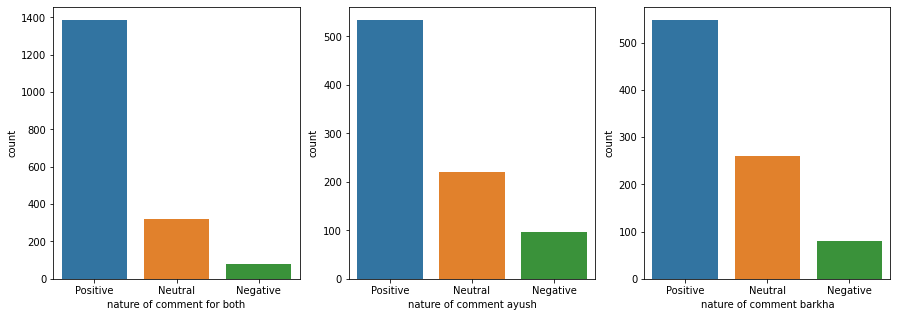

In [54]:
fig,axes = plt.subplots(ncols = 3,figsize=(15,5))
sns.countplot(ax=axes[0],x=df1['nature of comment for both'])
sns.countplot(ax=axes[1],x=df2['nature of comment ayush'])
sns.countplot(ax=axes[2],x=df3['nature of comment barkha'])

In [58]:
f1 = pd.DataFrame(df1['nature of comment for both'].value_counts())
f2 = pd.DataFrame(df2['nature of comment ayush'].value_counts())
f3 = pd.DataFrame(df3['nature of comment barkha'].value_counts())

In [60]:
pd.concat([f1,f2,f3],axis=1)

,nature of comment for both,nature of comment ayush,nature of comment barkha
Positive,1386,534,548
Neutral,321,220,261
Negative,79,96,81


<AxesSubplot:>

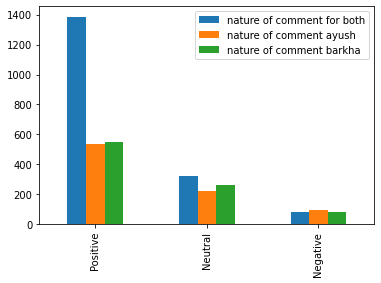

In [61]:
pd.concat([f1,f2,f3],axis=1).plot(kind='bar')

### hence it is clear that audience love both the actors and most of the comments have positive response to both of them and hence audience loves to see them together